# ***Задача "В поисках нефти"***

Данные доступны на [гугл диске](https://drive.google.com/drive/folders/1ZrEZ1HxB-4VWQHl8F0E0vy61PCuQ2xsy?usp=sharing). Решения можно отправлять в @lyfe_without_kaggle_bot

Полная версия задачи доступна по [ссылке](https://contest.yandex.ru/contest/34678/problems/?success=91017591#3331297/2021_04_06/GTd3yk8iIv).

В ходе разведки месторождений нефти специалисты производят пробные бурения скважин и осуществляют анализ получаемых в ходе этого технических, геологических и геофизических данных. Целью этого является обнаружение нефтенасыщенных пластов, то есть пластов, содержащих в себе нефть и способных ее отдавать.


Перед вами стоит задача разработать алгоритм интеллектуального анализа реальных данных, подготовленных ПАО "Газпром-Нефть" , позволяющий наиболее качественно определять наличие или отсутствие нефтяных пластов на тех или иных глубинах залегания скважин.

* MD — относительная глубина скважины (относительно поверхности бурения), всегда является положительной величиной, используется для привязки глубин внутри скважины, но не может выступать в роли какого-то признака при прогнозе (по крайней мере с физической точки зрения).


* TVDSS — глубина скважины относительно уровня моря, всегда является положительной величиной, может отражать поверхность геологического пласта или уровень водонефтяного контакта.


* Layer — название пласта, геологическая принадлежность интервала, качественная характеристика, выдаваемая геологом на основе его понимания геометрических характеристик целевого пласта, служащая для сопоставления пластов из различных скважин между собой.


* GK — гамма-каротаж, измеряет естественную радиоактивность пород, различные минералы имеют разное содержание радиоактивных материалов, как правило, чем выше — тем больше глинистая составляющая и меньше песчанистая, может измеряться в единицах API или мкр/ч.


* NNKT_big — нейтронный каротаж, регистрирует относительное водородосодержание, что может говорить о количестве пор в горных породах (они не могут быть пустыми и всегда содержат какой-то флюид, который в значительном объеме содержит в себе водород). Меньшие значения отвечают за более высокое флюидосодержание.


* PS — каротаж естественной поляризации, последняя возникает при фильтрации флюида через породу, уменьшение значений говорит о наличии проницаемого интервала. Единица измерения — милливольты, может иметь совершенно разный масштаб в разных скважинах.


* IK — индукционный каротаж, отражает электрическую проводимость горных пород, величину, обратную сопротивлению. Поскольку нефть является диэлектриком, а вода проводником, высокие показания отражают водонасыщенные пласты, а низкие — интервалы, вмещающие нефть. С другой стороны, плотные породы, не содержащие в себе пор, также имеют высокое сопротивление, поскольку не имеют в себе флюида, который способен проводить ток.


* BK — боковой зонд, отражает сопротивление горной породы, интерпретируется схожим образом с кривой индукционного каротажа, но уже наоборот, повышенные значения — нефть или плотные породы, пониженные — вода или глина.


* PZ — потенциал-зонд, отражает сопротивление горной породы, интерпретируется схожим образом с кривой индукционного каротажа, но уже наоборот, повышенные значения — нефть или плотные породы, пониженные — вода или глина. Схож с боковым зондом (BK), но имеет другую глубинность исследования.


* Grad_zond — другая группа зондов, отвечающих за сопротивление горных пород, в зависимости от числа в названии определяется глубинность метода. При бурении буровой раствор попадает в пласт и может изменить содержание того или иного флюида, поэтому, в теории, пониженые сопротивления в затронутой части пласта и повышенные в глубинной могут быть признаком наличия углеводородов.


* target_collector — бинарная характеристика, выдаваемая специалистом по интерпретации каротажных данных, отвечающая за то, является ли тот или иной интервал коллекторским пластом, то есть пластом, способным принимать и отдавать флюид.


* target_oil — бинарная характеристика, выдаваемая специалистом по интерпретации каротажных данных, отвечающая за то, является ли тот или иной интервал коллекторским нефтенасыщенным пластом.
Well — номер скважины.


*В качестве целевой переменной выступает target_oil, которая при значении 1 говорит о наличии нефтенасыщенного пласта, а при значении 0 — о его отсутствии.*

## Предварительное исследование данных

Загружаем наши данные с гугл диска

In [130]:
from google.colab import drive
drive.mount('/content/gdrive')

path="/content/gdrive/MyDrive/Task_1_Demo/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [131]:
import numpy as np
import pandas as pd

train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

In [132]:
train

,MD,TVDSS,Layer,GK,NNKT_big,PS,IK,BK,PZ,Grad_zond1,Grad_zond2,Grad_zond3,Grad_zond4,Grad_zond7,target_oil,target_collector,Well
0,2556.1,-2439.08,8,6.38,2.74,144.41,149.76,13.65,25.59,21.55,40.73,19.34,4.77,6.46,0,0,67
1,2807.7,-2539.79,1,5.32,2.73,84.18,96.66,7.87,10.86,9.57,10.15,7.05,6.35,10.98,0,0,223
2,2680.0,-2486.09,0,7.94,2.26,71.07,163.18,5.51,8.24,11.31,15.54,18.72,15.06,7.39,0,0,695
3,2732.6,-2561.26,3,7.28,2.14,105.13,135.71,6.38,8.18,7.67,10.35,7.00,7.12,6.75,0,0,409
4,2753.6,-2506.84,0,7.42,1.93,88.78,120.94,4.89,6.57,5.05,6.91,7.09,9.84,5.10,0,0,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2753.9,-2565.16,3,7.07,3.88,14.31,64.09,13.34,21.59,33.71,101.75,62.17,29.23,32.25,1,1,395
797,2696.5,-2540.98,3,4.27,2.65,67.50,16.60,37.83,53.85,22.68,31.80,12.77,9.80,92.49,1,1,879
798,2795.5,-2471.96,0,5.63,3.38,49.35,93.93,28.39,23.01,15.16,27.43,3.33,3.75,36.94,1,1,79
799,2785.9,-2566.30,3,5.67,2.31,50.48,68.59,15.98,24.97,17.20,27.56,24.83,22.44,14.17,1,1,89


In [133]:
test

,MD,TVDSS,Layer,GK,NNKT_big,PS,IK,BK,PZ,Grad_zond1,Grad_zond2,Grad_zond3,Grad_zond4,Grad_zond7,target_collector,Well
0,2849.5,-2555.98,3,5.09,3.57,45.97,55.46,22.80,33.51,23.82,36.52,12.11,8.07,40.15,1,27
1,2817.1,-2548.58,3,5.59,2.59,59.94,16.85,40.98,56.87,27.16,86.58,101.16,40.77,65.69,1,301
2,2815.8,-2543.23,3,5.89,2.36,102.56,90.02,13.24,12.84,6.77,9.04,7.07,6.68,29.91,0,818
3,2936.4,-2560.35,3,5.21,2.41,119.87,106.55,10.23,9.04,9.49,12.18,8.33,NaN,5.45,0,637
4,2719.9,-2581.19,3,5.73,2.52,49.04,69.78,19.18,26.92,21.70,34.94,28.95,21.90,9.23,1,835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2846.7,-2558.65,3,5.91,2.92,44.52,83.54,15.38,23.61,15.77,19.47,12.24,12.54,28.31,1,101
96,2710.8,-2589.21,6,8.17,2.19,126.73,198.56,3.84,4.15,4.41,4.53,4.85,3.40,4.20,0,162
97,2961.1,-2559.85,1,7.42,3.01,222.28,124.48,9.21,8.43,7.92,7.09,6.98,7.80,9.08,0,364
98,2761.1,-2549.70,3,5.58,3.00,58.15,41.98,25.14,39.19,30.89,66.77,75.00,54.19,19.46,1,652


In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MD                801 non-null    float64
 1   TVDSS             801 non-null    float64
 2   Layer             801 non-null    int64  
 3   GK                801 non-null    float64
 4   NNKT_big          801 non-null    float64
 5   PS                801 non-null    float64
 6   IK                801 non-null    float64
 7   BK                801 non-null    float64
 8   PZ                801 non-null    float64
 9   Grad_zond1        795 non-null    float64
 10  Grad_zond2        797 non-null    float64
 11  Grad_zond3        797 non-null    float64
 12  Grad_zond4        796 non-null    float64
 13  Grad_zond7        794 non-null    float64
 14  target_oil        801 non-null    int64  
 15  target_collector  801 non-null    int64  
 16  Well              801 non-null    int64  
dt

In [135]:
train.isnull().sum()

MD                  0
TVDSS               0
Layer               0
GK                  0
NNKT_big            0
PS                  0
IK                  0
BK                  0
PZ                  0
Grad_zond1          6
Grad_zond2          4
Grad_zond3          4
Grad_zond4          5
Grad_zond7          7
target_oil          0
target_collector    0
Well                0
dtype: int64

In [136]:
test.isnull().sum()

MD                  0
TVDSS               0
Layer               0
GK                  0
NNKT_big            0
PS                  0
IK                  0
BK                  0
PZ                  0
Grad_zond1          0
Grad_zond2          0
Grad_zond3          0
Grad_zond4          1
Grad_zond7          0
target_collector    0
Well                0
dtype: int64

<Figure size 1500x700 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

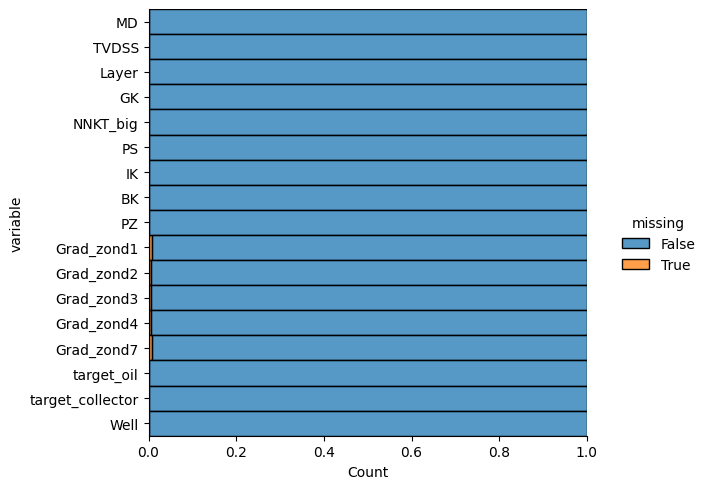

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)


plt.figure(figsize=(10,6))
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

<ipython-input-139-2062bb0cc888>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Grad_zond1'], bins=70)


<Axes: xlabel='Grad_zond1', ylabel='Density'>

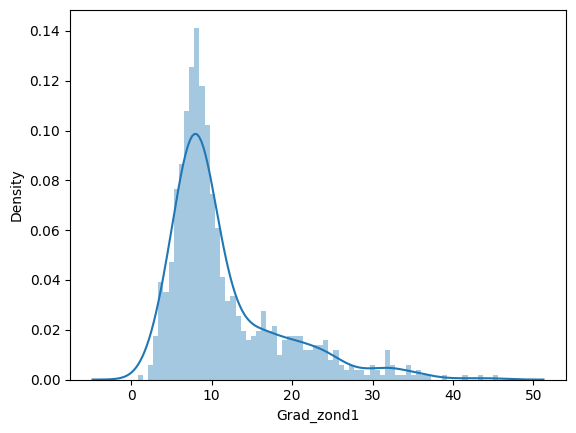

In [139]:
sns.distplot(train['Grad_zond1'], bins=70)

<ipython-input-140-0d2709b4816d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['MD'], bins=70)


<Axes: xlabel='MD', ylabel='Density'>

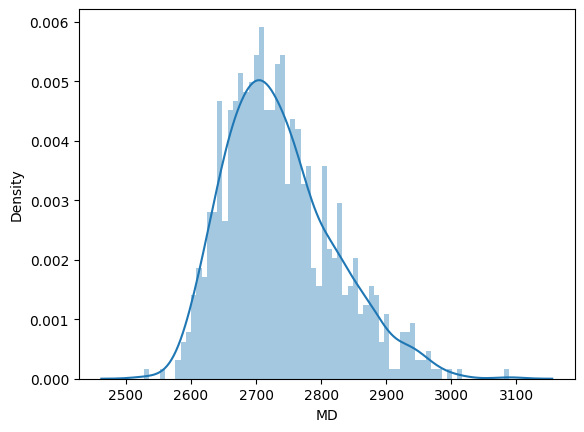

In [140]:
sns.distplot(train['MD'], bins=70)

<BarContainer object of 2 artists>

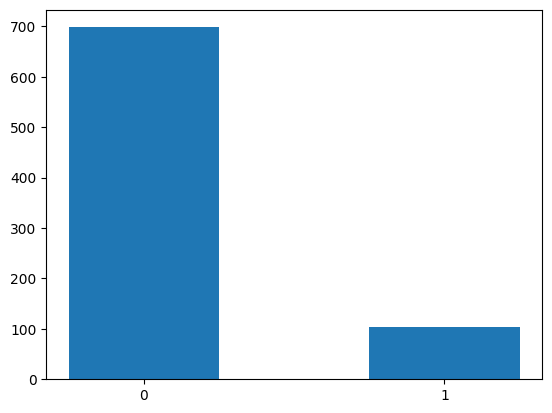

In [141]:
import matplotlib.pyplot as plt

groups = ["0", "1"]
counts = [len(train.loc[train["target_oil"]==0.0]), len(train.loc[train["target_oil"]==1.0])]

plt.bar(groups, counts, width=0.5)

Видно, что распределение данных по классам очень неравномерное. Можно поробовать использовать, например, SMOTE, чтобы это исправить

In [143]:
target_oil=train["target_oil"]
train = train.drop('target_oil', axis=1)

train.insert(16, 'target_oil', target_oil)

Рассмотрим матрицу корреляции

In [144]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,MD,TVDSS,Layer,GK,NNKT_big,PS,IK,BK,PZ,Grad_zond1,Grad_zond2,Grad_zond3,Grad_zond4,Grad_zond7,target_collector,Well,target_oil
MD,1.000000,-0.349511,0.260389,-0.057648,-0.057633,0.059346,-0.058102,-0.016591,-0.020036,0.014190,0.013758,-0.012484,0.061745,-0.033522,0.044084,-0.022833,0.078135
TVDSS,-0.349511,1.000000,-0.680389,0.009391,0.008811,0.000101,0.098969,0.042533,-0.052679,-0.060029,-0.022478,-0.049806,-0.143981,-0.010316,-0.095025,0.000261,-0.141660
Layer,0.260389,-0.680389,1.000000,-0.012723,-0.011988,0.052070,-0.037199,-0.011952,0.107980,0.117546,0.043672,0.112062,0.178843,0.073992,0.101743,-0.011086,0.212424
GK,-0.057648,0.009391,-0.012723,1.000000,0.999976,-0.014994,-0.002703,-0.005885,-0.007949,0.024102,-0.001896,-0.015263,-0.016857,-0.009966,-0.023304,-0.027547,-0.015842
NNKT_big,-0.057633,0.008811,-0.011988,0.999976,1.000000,-0.016509,-0.006172,-0.004061,-0.004270,0.027916,-0.001007,-0.011901,-0.013927,-0.007583,-0.019897,-0.027494,-0.012967
PS,0.059346,0.000101,0.052070,-0.014994,-0.016509,1.000000,0.191889,-0.109315,-0.207631,-0.159628,-0.061132,-0.203575,-0.137600,-0.115228,-0.245374,-0.075025,-0.143171
IK,-0.058102,0.098969,-0.037199,-0.002703,-0.006172,0.191889,1.000000,-0.240521,-0.566085,-0.599136,-0.143010,-0.515760,-0.508531,-0.367487,-0.320945,0.008775,-0.469716
BK,-0.016591,0.042533,-0.011952,-0.005885,-0.004061,-0.109315,-0.240521,1.000000,0.473452,0.339162,0.119723,0.581676,0.319628,0.194185,0.067888,-0.011381,0.107505
PZ,-0.020036,-0.052679,0.107980,-0.007949,-0.004270,-0.207631,-0.566085,0.473452,1.000000,0.708997,0.170768,0.683288,0.578751,0.810293,0.430217,0.044461,0.528867
Grad_zond1,0.014190,-0.060029,0.117546,0.024102,0.027916,-0.159628,-0.599136,0.339162,0.708997,1.000000,0.179677,0.698688,0.612382,0.371793,0.525450,-0.002295,0.529075


## Пропуски в данных и категориальные признаки

Можно избавиться от пропусков в данных, например, удалив столбцы, в которых пропуски присутствуют.

Но при этом мы потеряем значительный объём данных

In [38]:
test=test.drop(columns=["PZ", "Grad_zond1", "Grad_zond2", "Grad_zond3", "Grad_zond4", "Grad_zond7"])
train=train.drop(columns=["PZ", "Grad_zond1", "Grad_zond2", "Grad_zond3", "Grad_zond4", "Grad_zond7"])

А можно заменить пропуски на наиболее часто встречающееся значение в столбце (mode), или на среднее арифметическое значений столбца (mean)

In [164]:
train['PZ'].fillna(train['PZ'].mode()[0], inplace=True)
test['PZ'].fillna(test['PZ'].mode()[0], inplace=True)

train['Grad_zond1'].fillna(train['Grad_zond1'].mode()[0], inplace=True)
test['Grad_zond1'].fillna(test['Grad_zond1'].mode()[0], inplace=True)

train['Grad_zond2'].fillna(train['Grad_zond2'].mode()[0], inplace=True)
test['Grad_zond2'].fillna(test['Grad_zond2'].mode()[0], inplace=True)

train['Grad_zond3'].fillna(train['Grad_zond3'].mode()[0], inplace=True)
test['Grad_zond3'].fillna(test['Grad_zond3'].mode()[0], inplace=True)

train['Grad_zond4'].fillna(train['Grad_zond4'].mode()[0], inplace=True)
test['Grad_zond4'].fillna(test['Grad_zond4'].mode()[0], inplace=True)

train['Grad_zond7'].fillna(train['Grad_zond7'].mode()[0], inplace=True)
test['Grad_zond7'].fillna(test['Grad_zond7'].mode()[0], inplace=True)

In [145]:
train.isna().sum()

MD                  0
TVDSS               0
Layer               0
GK                  0
NNKT_big            0
PS                  0
IK                  0
BK                  0
PZ                  0
Grad_zond1          6
Grad_zond2          4
Grad_zond3          4
Grad_zond4          5
Grad_zond7          7
target_collector    0
Well                0
target_oil          0
dtype: int64

Вспомним, что у нас есть категориальные переменные. Они не вызывают большого количества проблем, так как значения в столбцах с категориальныи переменными уже предсавлены в чисовом виде. Закодируем столбец Layer с помощью OneHotEncoder

In [146]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_new = onehotencoder.fit_transform(pd.DataFrame(pd.concat([train, test])['Layer']).values)
f=pd.DataFrame(data_new.toarray(),
columns=onehotencoder.categories_)

In [147]:
col=f.columns
for i in col:
  train[i]=f[i][:len(train)]
  test[i]=f[i][:-len(test)]

In [148]:
train=train.drop(columns=["Layer"])
test=test.drop(columns=["Layer"])

In [149]:
train= train.rename(str,axis="columns")
test= test.rename(str,axis="columns")

In [150]:
train

,MD,TVDSS,GK,NNKT_big,PS,IK,BK,PZ,Grad_zond1,Grad_zond2,...,Well,target_oil,"(0,)","(1,)","(2,)","(3,)","(6,)","(7,)","(8,)","(9,)"
0,2556.1,-2439.08,6.38,2.74,144.41,149.76,13.65,25.59,21.55,40.73,...,67,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2807.7,-2539.79,5.32,2.73,84.18,96.66,7.87,10.86,9.57,10.15,...,223,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2680.0,-2486.09,7.94,2.26,71.07,163.18,5.51,8.24,11.31,15.54,...,695,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2732.6,-2561.26,7.28,2.14,105.13,135.71,6.38,8.18,7.67,10.35,...,409,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2753.6,-2506.84,7.42,1.93,88.78,120.94,4.89,6.57,5.05,6.91,...,316,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2753.9,-2565.16,7.07,3.88,14.31,64.09,13.34,21.59,33.71,101.75,...,395,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
797,2696.5,-2540.98,4.27,2.65,67.50,16.60,37.83,53.85,22.68,31.80,...,879,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
798,2795.5,-2471.96,5.63,3.38,49.35,93.93,28.39,23.01,15.16,27.43,...,79,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,2785.9,-2566.30,5.67,2.31,50.48,68.59,15.98,24.97,17.20,27.56,...,89,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [151]:
test

,MD,TVDSS,GK,NNKT_big,PS,IK,BK,PZ,Grad_zond1,Grad_zond2,...,target_collector,Well,"(0,)","(1,)","(2,)","(3,)","(6,)","(7,)","(8,)","(9,)"
0,2849.5,-2555.98,5.09,3.57,45.97,55.46,22.80,33.51,23.82,36.52,...,1,27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2817.1,-2548.58,5.59,2.59,59.94,16.85,40.98,56.87,27.16,86.58,...,1,301,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2815.8,-2543.23,5.89,2.36,102.56,90.02,13.24,12.84,6.77,9.04,...,0,818,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2936.4,-2560.35,5.21,2.41,119.87,106.55,10.23,9.04,9.49,12.18,...,0,637,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2719.9,-2581.19,5.73,2.52,49.04,69.78,19.18,26.92,21.70,34.94,...,1,835,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2846.7,-2558.65,5.91,2.92,44.52,83.54,15.38,23.61,15.77,19.47,...,1,101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
96,2710.8,-2589.21,8.17,2.19,126.73,198.56,3.84,4.15,4.41,4.53,...,0,162,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,2961.1,-2559.85,7.42,3.01,222.28,124.48,9.21,8.43,7.92,7.09,...,0,364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
98,2761.1,-2549.70,5.58,3.00,58.15,41.98,25.14,39.19,30.89,66.77,...,1,652,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Работа с выбросами

Небольшое напоминание про то, что такое выбросы в данных

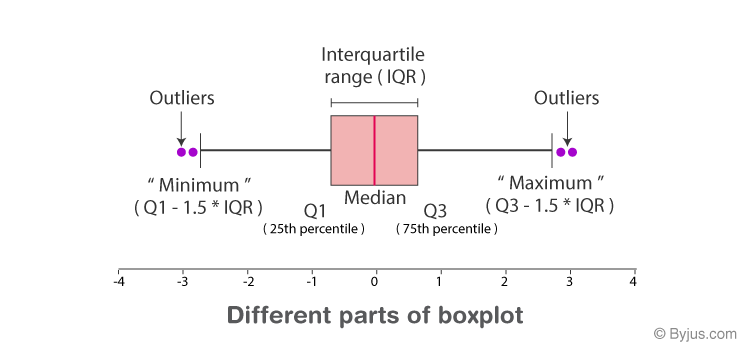

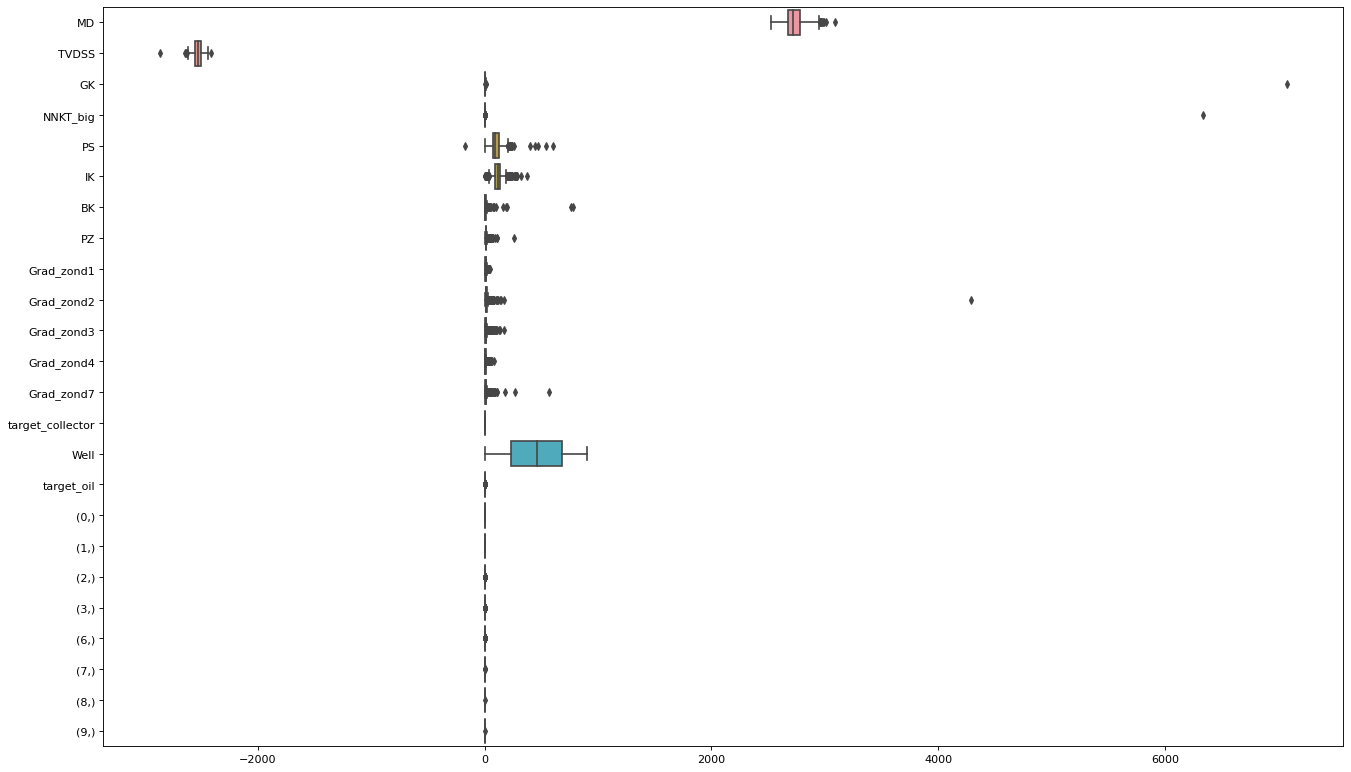

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12), dpi= 80)
sns.boxplot(data=train, orient='h')
plt.show()

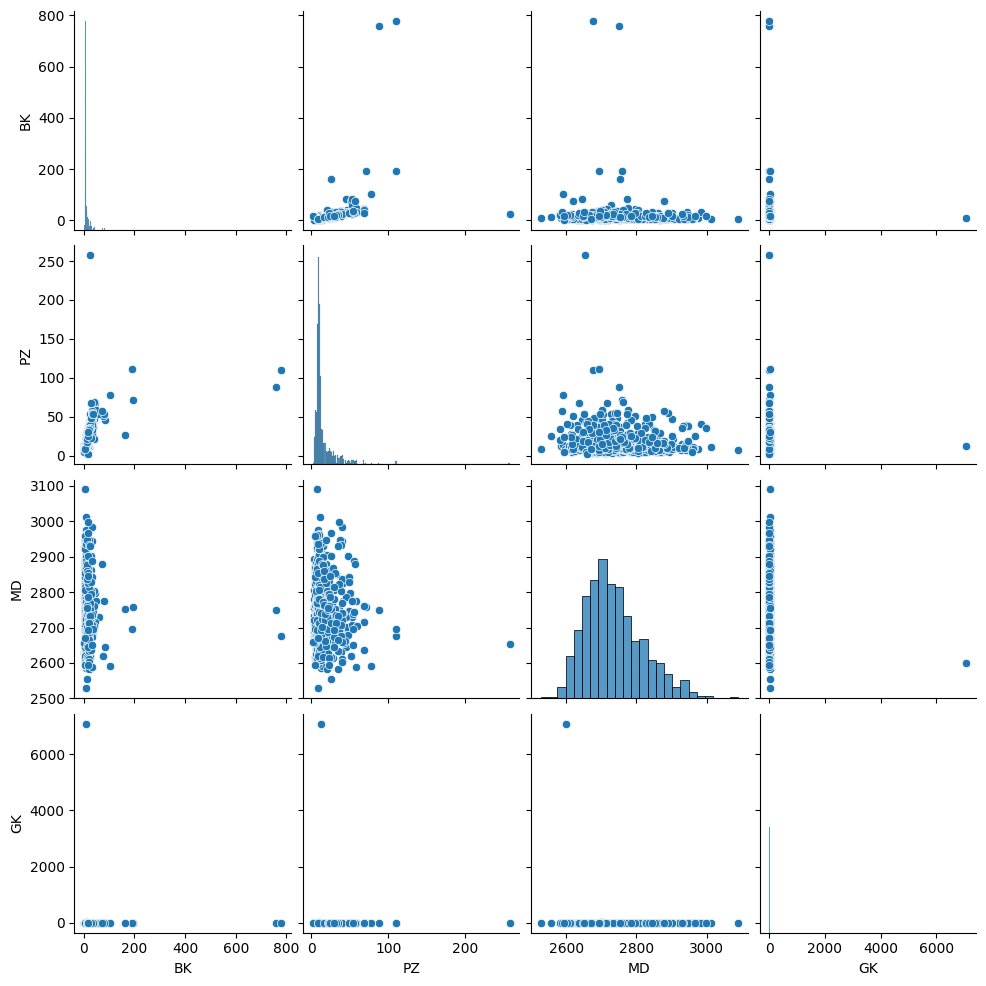

In [156]:
tmp = train[["BK", "PZ", "MD", "GK"]]
sns.pairplot(tmp)

In [157]:
import numpy as np
hd=train.head()
for j in hd:
  for x in [j]:
      if j=="target_oil":
        break
      q75,q25 = np.percentile(train.loc[:,x],[75,25])
      intr_qr = q75-q25

      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)

      train.loc[train[x] < min,x] = np.nan
      train.loc[train[x] > max,x] = np.nan


In [158]:
hd=train.head()
for j in hd:
  train = train.dropna(axis='index', how='any', subset=[j])


In [159]:
train= train.rename(str,axis="columns")
test= test.rename(str,axis="columns")

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=["target_oil"]), train["target_oil"], test_size=0.15)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (326, 23), (326,)
Train dataset size: (58, 23), (58,)


## Модель для классификации

In [166]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [167]:
import sklearn
y_pred=model.predict(X_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

1.0

In [168]:
test["target_oil"]=model.predict(test)

In [169]:
from google.colab import files

test.to_csv('prediction.csv', index=False)
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>